## Project 4
##### Nicole Tran
### Predicting IBM Closing Stock Value

### Imports

In [215]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Alpha Vantage API Data Retrieval

Nicole's key: SM128O7TM7IKTSGT
Nicole's second key: WG8D1MWFU6JXSZOJ

In [216]:
#get data from api
key = "SM128O7TM7IKTSGT"
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey={key}'
r = requests.get(url)
data = r.json()
print(data)
data = data['Time Series (Daily)']

#put into a pd df
df = pd.DataFrame(data).T
df.reset_index(inplace=True)
col_names = ["date","open","high","low","close","volume"]
df.columns = col_names
df.date = pd.to_datetime(df.date)

#grab only from 2023-11-07 to 2024-03-26
inbetween = df.date.between(pd.to_datetime("2023-11-07"), pd.to_datetime("2024-03-26"))
ibm_daily = df[inbetween]
ibm_daily.head()



{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-04-26', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-04-26': {'1. open': '167.5000', '2. high': '167.8700', '3. low': '165.7300', '4. close': '167.1300', '5. volume': '8983796'}, '2024-04-25': {'1. open': '168.2000', '2. high': '172.4500', '3. low': '165.6600', '4. close': '168.9100', '5. volume': '16702150'}, '2024-04-24': {'1. open': '183.1700', '2. high': '184.2900', '3. low': '181.4000', '4. close': '184.1000', '5. volume': '7616643'}, '2024-04-23': {'1. open': '182.7300', '2. high': '184.6800', '3. low': '179.0000', '4. close': '182.1900', '5. volume': '5950229'}, '2024-04-22': {'1. open': '182.4500', '2. high': '183.3150', '3. low': '180.4500', '4. close': '181.9000', '5. volume': '3076451'}, '2024-04-19': {'1. open': '182.4300', '2. high': '182.8000', '3. low': '180.5700', '4. close': '181.5800', '5. vol

,date,open,high,low,close,volume
22,2024-03-26,189.0200,190.0000,188.5000,188.5000,4229535
23,2024-03-25,190.2600,190.8200,188.7500,188.7900,3718289
24,2024-03-22,192.0000,192.9850,190.5100,190.8400,3988398
25,2024-03-21,193.0000,193.3700,190.0100,191.9000,6013561
26,2024-03-20,192.8700,193.9800,191.3100,193.9600,3238643


In [217]:
#SAVED_DATA = ibm_daily.copy(deep=True)
#SAVED_DATA.to_csv('ibm_daily.csv', index=False)  
ibm_daily = pd.read_csv("ibm_daily.csv")
ibm_daily.date = pd.to_datetime(ibm_daily.date)

print(ibm_daily.head())

#split into test and train
test = ibm_daily[:5]
train = ibm_daily[5:]

        date    open     high     low   close   volume
0 2024-03-26  189.02  190.000  188.50  188.50  4229535
1 2024-03-25  190.26  190.820  188.75  188.79  3718289
2 2024-03-22  192.00  192.985  190.51  190.84  3988398
3 2024-03-21  193.00  193.370  190.01  191.90  6013561
4 2024-03-20  192.87  193.980  191.31  193.96  3238643


### Visualize Data

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


/var/folders/lq/m6qymkcx1718frgl__z9ssrc0000gn/T/ipykernel_7315/3313583525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[["open","high","low","close","volume"]] = train[["open","high","low","close","volume"]].astype(float)


<Figure size 640x480 with 0 Axes>

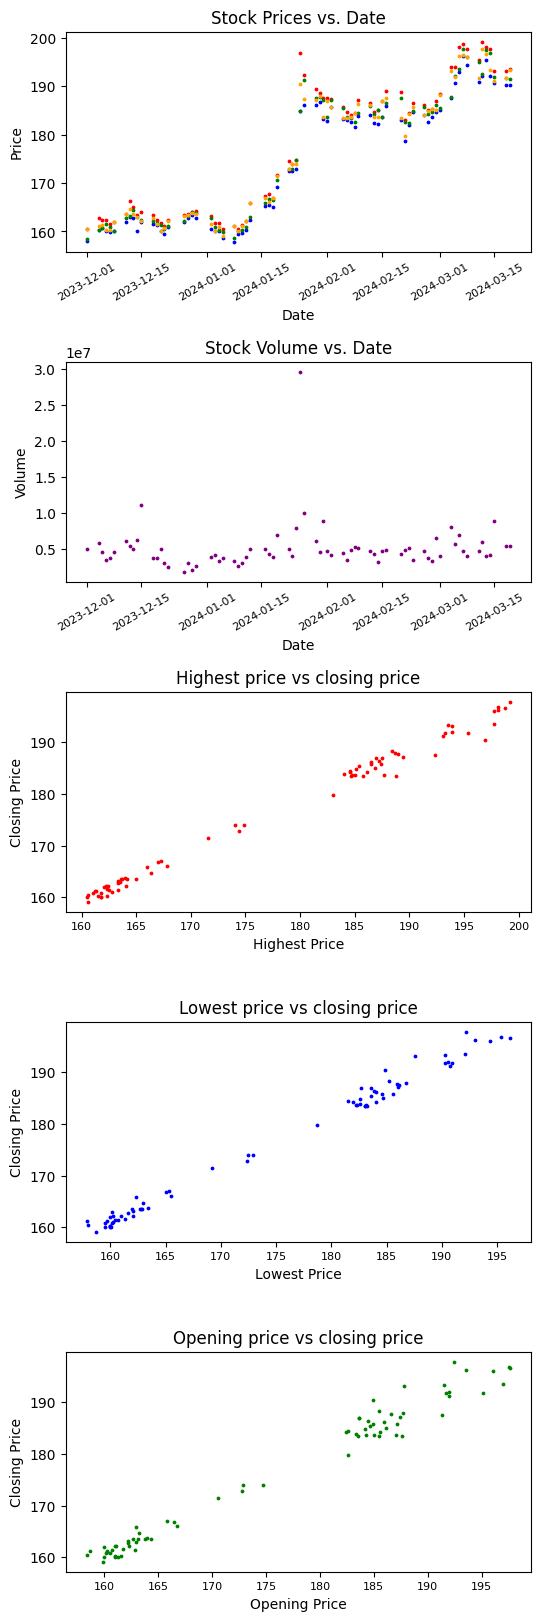

In [218]:
#data viz (use subplot)

#listing column names
print(train.columns)
train[["open","high","low","close","volume"]] = train[["open","high","low","close","volume"]].astype(float)
plt.tight_layout()
fig, axs = plt.subplots(5, figsize=(6, 20))
plt.rc('xtick', labelsize=8)
#plt.xticks(rotation=45)


#plotting all cols against date (ind)
axs[0].scatter(train.date, train.high, color='red', s=3)
axs[0].scatter(train.date, train.low, color='blue', s=3)
axs[0].scatter(train.date, train.open, color='green', s=3)
axs[0].scatter(train.date, train.close, color='orange', s=3)
axs[0].set_title('Stock Prices vs. Date')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].tick_params(axis='x', rotation=30) # Rotate x-axis tick marks for the dates


#plotting volume against date (ind)
axs[1].scatter(train.date, train.volume, color='purple', s=3)
axs[1].set_title('Stock Volume vs. Date')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].tick_params(axis='x', rotation=30) # Rotate x-axis tick marks for the dates

#plotting highest price (ind) vs closing price (dep)
axs[2].scatter(train.high, train.close, color='red', s=3)
axs[2].set_title('Highest price vs closing price')
axs[2].set_xlabel('Highest Price')
axs[2].set_ylabel('Closing Price')

#plotting lowest price (ind) vs closing price (dep)
axs[3].scatter(train.low, train.close, color='blue', s=3)
axs[3].set_title('Lowest price vs closing price')
axs[3].set_xlabel('Lowest Price')
axs[3].set_ylabel('Closing Price')

#plotting opening price (ind) vs closing price (dep)
axs[4].scatter(train.open, train.close, color='green', s=3)
axs[4].set_title('Opening price vs closing price')
axs[4].set_xlabel('Opening Price')
axs[4].set_ylabel('Closing Price')

plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
plt.show()

### Conjectures about what to expect

It looks like all the price vs closing price models (lowest, opening, and highest vs closing) have a linear relationship that is very strongly positive - this makes sense, as an overall higher price of the stock would usually mean the lowest, opening, and highest price would be higher as well, leading to a higher closing price. However, volume vs date doesn't have much of a linear relationship - probably because the amount of stocks being sold isn't going up as time goes on. The overall prices versus dates also aren't very linear- they vary not just based on date but based on random economic fluctuations and announcements by the company that could affect price. Although the trend is overall upwards, it's decidely not linear. Therefore, I think the best linear regression models will probably depend on the prices as independent variables rather than the volume sold or the date because those variables have the best linear relationship with the dependent variable.

### Multivariate Linear Regression model

Dependent variable: closing price
Independent variable: high, open, and low prices

In [219]:
#mlr model

# Training data (X, y), T time steps, alpha step
X = train[["open","high","low"]]#the three feature
X['bias'] = pd.Series(np.ones(X.shape[0]), index=X.index)
print(X.shape)
#print(X.head())
y = train.close
print(y.shape)
#print(y.head())
def grad_descent(X, y, T, alpha):
    m, n = X.shape # m = #examples, n = #features
    theta = np.zeros(n) # initialize parameters
    f = np.zeros(T) # track loss over time
    for i in range(T):
        f[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        #print(f"loss == {f[i]}")
        # compute steepest ascent at f(theta)
        g = np.transpose(X).dot(X.dot(theta)-y)
        #print(f"gradient = {g}")
        # step down the gradient
        theta = theta - alpha*g
        #print(f"new theta = {theta}")
    return theta, f


(74, 4)
(74,)


/var/folders/lq/m6qymkcx1718frgl__z9ssrc0000gn/T/ipykernel_7315/2055145894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bias'] = pd.Series(np.ones(X.shape[0]), index=X.index)


In [220]:
T = 10000
alpha = 0.0000000001
theta,loss = grad_descent(X,y,T,alpha)
theta

open    0.333022
high    0.336100
low     0.330697
bias    0.001884
dtype: float64

#### Weights: 

open    0.333022

high    0.336100

low     0.330697

#### Bias: 

bias    0.001884


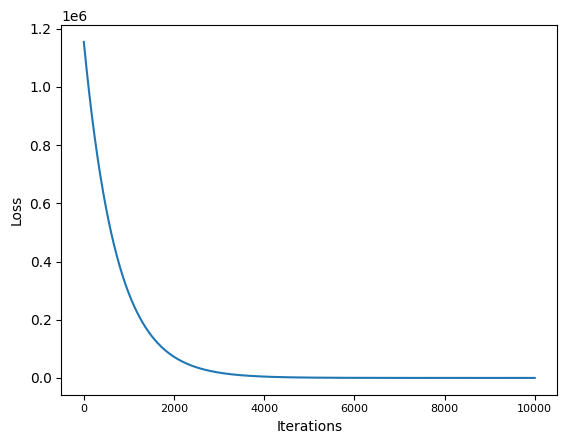

In [221]:
#plot loss to see if it converges

plt.plot(range(T),loss)
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

### Checking Against Test Set

In [222]:
#getting 5 predictions
def predict(opening, high, low):
    close = theta.dot([opening, high, low, 0])
    return close

se = 0

#MSE for 5 days
for index, row in test.iterrows():
    prediction = predict(row["open"],row["high"], row["low"])
    print(prediction)
    error = (row["close"] - prediction)**2
    se += error

mse = se/5
print(f"This is the mean standard error for the first five days: {mse}")

189.14307170702057
189.9142944908395
191.8034345935996
192.10050606103277
192.69214016861193
This is the mean standard error for the first five days: 0.8506913542410237


Predictions:

189.14508694
189.91631046999998
191.80545196999998
192.10252397
192.69415820999998

MSE:

The MSE was 0.8520362674204043 and I think it so low because it is well fitted to the data we gave it- this test set looks very similar and linearly in line to the data we fit the model on.

The loss function plot is shown above!

### Add Regularization with RidgeRegression

The use of regularizing is to get rid of overfitting problems in a model, decreasing training accuracy slightly in return for more generalizability.

Ridge regression adds in a penalty term into the loss function and has the feature of removing multicollinear features from the model (in our case, this is good because a lot of our features have linear relationships with each other already). However, it doesn't actually remove features from the model altogehter like L1 regularization would, it only reduces the weight to almost zero. Its main purpose is to increase the cost for a model with large coefficients.

In [223]:
#penalty term in ridge regression is the squared sum of coefficients

def grad_descent_reg(X, y, T, alpha, lambda_val):
    m, n = X.shape # m = #examples, n = #features
    theta = np.zeros(n) # initialize parameters
    f = np.zeros(T) # track loss over time
    for i in range(T):
        f[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2 + 0.5*lambda_val * np.linalg.norm(theta)**2
        #print(f"loss == {f[i]}")
        # compute steepest ascent at f(theta)
        g = np.transpose(X).dot(X.dot(theta)-y) + + lambda_val*theta
        #print(f"gradient = {g}")
        # step down the gradient
        theta = theta - alpha*g
        #print(f"new theta = {theta}")
    return theta, f

In [224]:
T = 10000
alpha = 0.0000000001
lambda_val = 12500
theta,loss = grad_descent_reg(X,y,T,alpha, lambda_val)
theta

open    0.332425
high    0.335497
low     0.330104
bias    0.001880
dtype: float64

#### Weights:

open    0.332425

high    0.335497

low     0.330104

#### Bias:

bias    0.001880

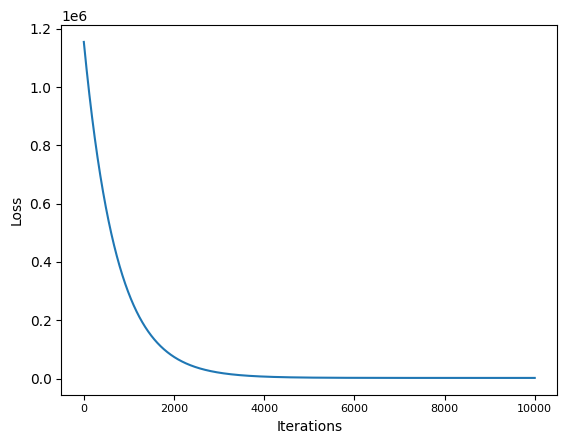

In [225]:
#plot loss to see if it converges

plt.plot(range(T),loss)
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

### Calculating Mean Standard Error

The MSE for the new RidgeRegression model across the 5 days is lower than the MSE when using the LinearRegression model without the regularization. I thought there would be some difference, because I thought that there was some multicollinearity going on in the dataset and RidgeRegression might shrink one of the feature weights towards zero because of that, and the error did end up being a little lower in the end after tinkering with what the hyperparameter should be. Overall, it lowered all the weight values.

In [226]:
#getting 5 predictions
def predict(opening, high, low):
    close = theta.dot([opening, high, low, 0])
    return close

se = 0

#MSE for 5 days
for index, row in test.iterrows():
    prediction = predict(row["open"],row["high"], row["low"])
    print(prediction)
    error = (row["close"] - prediction)**2
    se += error

mse = se/5
print(f"This is the mean standard error for the first five days: {mse}")

188.8041180111279
189.5739588747412
191.4597134775608
191.7562528001397
192.3468264349506
This is the mean standard error for the first five days: 0.7428232569380602


### Pros and Cons

I don't think this model would have practical value in the real world. We wouldn't get information like the highest and lowest price for the stock during that day until the day was over, and by that point we'd have the actual closing price already. The only parameter we could actually have at the start of day is just opening price. I think it would be useful in either hypotheticals or to predict in a vaccuum, but I don't think it's really viable due to how we can't get access to the data we need to predict the closing price until we actually get the closing price. I think it's nice to see that there is a connection between the prices, and to connect them in a mathematical way, but for use in predicting it's not useful.

I picked the coefficient for the L2-norm via testing all powers of 10 from 0.001 to 100000 and the MSE for the test set stayed around 0.85 (similar to the no regularization model) until I hit 10000, where the error dropped to about 0.75. Then I went up by 1000 at a time until the error went back up (13000) and tried 12500, which got an error of about 0.7428, which I decided to deem good enough.